## 📑 `Failure cases in outpainted vehicles`

Saved: figs/fig10/artifact_grid.pdf


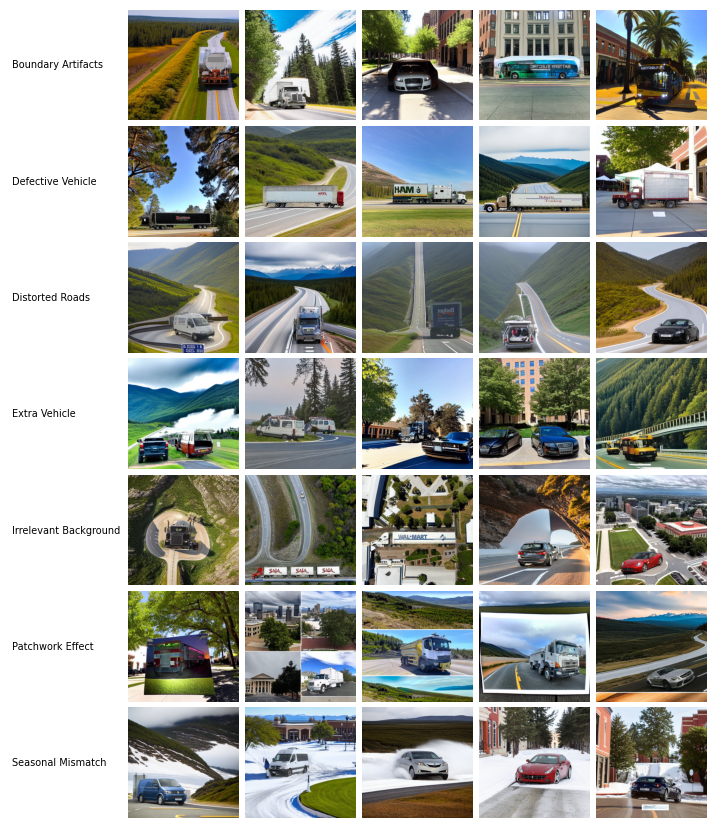

In [3]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from src import utils 

# ----- CONFIG -----
root = Path("figs/fig10/failures_selected")     # each subfolder is an artifact category
valid_ext = {".png", ".jpg", ".jpeg", ".bmp", ".webp"}
pdf_out = "figs/fig10/artifact_grid.pdf"
title_fs = 7
# -------------------

def prettify(s: str) -> str:
    return s.replace("_", " ").title()

# Collect categories and build images dict
cats = [d for d in sorted(root.iterdir()) if d.is_dir()]
assert cats, f"No category folders under {root}"

images = {}
for d in cats:
    label = prettify(d.name)
    ims = []
    for p in sorted(d.iterdir()):
        if p.suffix.lower() in valid_ext:
            ims.append(Image.open(p).convert("RGB"))
    if ims:
        images[label] = ims

# Row order mapping
class_index = {label: i for i, label in enumerate(sorted(images.keys()))}
loader = utils.ImageLoader(folder_path=str(root), config={"class_index": class_index})

# ---- plotting with labels in the first column ----
num_classes = len(loader.class_index)
max_images = max(len(v) for v in images.values())
max_images_plus = max_images + 1  # extra column for category names

fig, axs = plt.subplots(num_classes, max_images_plus,
                        figsize=(max_images_plus * 1.5, num_classes * 1.5))

if num_classes == 1:
    axs = [axs]
axs = [axs[j] if max_images_plus > 1 else [axs[j]] for j in range(num_classes)]

for class_name, row_index in loader.class_index.items():
    row_list = images.get(class_name, [])

    # leftmost axis reserved for label
    label_ax = axs[row_index][0]
    label_ax.set_axis_off()
    label_ax.text(0.02, 0.5, class_name, ha="left", va="center", fontsize=title_fs)

    # fill images from the RIGHT toward the LEFT across columns 1..max_images
    for col_index in range(max_images):
        # target column index counting from the right
        ax = axs[row_index][max_images - col_index]  # rightmost = max_images
        if col_index < len(row_list):
            ax.imshow(row_list[col_index])           # keep order within the row
        ax.axis("off")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig(pdf_out, format="pdf", bbox_inches='tight', dpi=300)
print("Saved:", pdf_out)
